# PYTHON BASICS

# Running Tellurium in Colab.

In [1]:
!apt-get install libncurses5
!pip install -q tellurium==2.2.8

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libncurses5 is already the newest version (6.3-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


You have to **restart the runtime any time you replace an old version of a package with a new version**, and we just replaced the old version of numpy with a newer one. You restart the runtime by ``Runtime>Restart and run all``

Run the following to handle legacy versions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tellurium as te

In [3]:
a = 1

# Python Basics

## Details

* Basic types: float, int, string
* Lists
* Arrays
    * Addressing
    * Slicing
* Control flow
   * if-then-else
   * for-loops
   * functions
* Python packages
    * numpy
    * matplotlib

In [4]:
a = "1"

In [5]:
b = 1
b + 4

5

In [6]:
a + str(4)

'14'

In [7]:
# List
alist = [1, a, [2, 3]]
alist

[1, '1', [2, 3]]

In [8]:
str(alist[0]) + str(alist[1])

'11'

In [9]:
alist.append("b")
alist

[1, '1', [2, 3], 'b']

In [10]:
alist[3]

'b'

In [12]:
arr = np.array(another_list)
arr

array([1, 2, 3])

In [13]:
arr2 = arr + 3
np.sqrt(np.sum((arr2 - arr)**2))

5.196152422706632

In [14]:
arr[0:2]

array([1, 2])

## Control flow

In [15]:
number = 25
is_prime = True
if number % 2 == 0:
  is_prime = False
if number % 3 == 0:
  is_prime = False
if number % 4 == 0:
  is_prime = False
if is_prime:
  print("Prime!!!")
else:
  print("Not prime.")

Prime!!!


In [16]:
number = 71
is_prime = True
for num in range(2, number):
  if number % num == 0:
    is_prime = False
if is_prime:
  print("Prime!!!")
else:
  print("Not prime.")


Prime!!!


In [17]:
def checkPrime(number):
  """
  Tests if number is prime
  Args:
    number: float
  Returns:
    bool
  """
  is_prime = True
  for num in range(2, number):
    if number % num == 0:
      is_prime = False
  return is_prime

# Tests

assert(not checkPrime(25))
assert(checkPrime(71))
print("OK!")



OK!


In [18]:
5 % 2

1

In [19]:
list(range(2, number))

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70]

# Review

Write a function that finds all prime numbers less than an integer. Think about the following:
* What is the name of the function?
* What are its arguments (the type and their semantics)
* What does it return (type and semantics)
* Can you describe in natural language how it works?
* How will you test the function? Does it run? Does it produce a result of the correct type? Does it produce a result that is correct?

for num less than input:

   * if num is prime, add to list

return the list

How would you find python that provides a feature?
* Study the documentation.
* Look for examples of similar features.
* Try something the seems reasonable and see if it fails.**bold text**

# Today's Agenda

* Submitting homework
    * Make a copy of the homework on your Google drive
    * Do the problems
    * Set permissions to "all can view"; copy URL
    * Submit URL via canvas
* More modeling
    * Antimony is a language. Key types are species, reactions, parameters, rate laws.
    * Reading and writing model elements.
    * Controlling simulations: start, end, number of points, selection of variables
    * ``steadyState()``
    * BioModels and reading models from BioModels
* Plotting
    * Plot types
    * Controlling appearance
    * subplots
    * getting help from the Internet
* Parameter scans
    * What is a parameter scan. Find the "best" value of a parameter. "Best" is defined by an objective function.
    * A first example
    * Elements of a parameter scan
      * Select the next parameter to evaluate
      * Evaluation: change parameter value, run simulation, quantify how "good" the result is

# Modeling reaction networks with Antimony

Antimony provides a human readable way to describe reaction networks. The key concepts are:
* Chemical species (``species``)
* Reactions
Antimony models are described in python strings, and they are executed using the ``tellurium`` package.

A first model. $S_1 \rightarrow S_2$ using *mass action* with the kinetic constant $k_1$.

Topics
* Construct the model
* Load the model--create a ``roadrunner`` object.
* Run a simulation; array data output
* Re-running a simulation (use reset)
* Plot the time course of the simulation
* Read and write variables (species, fluxes)
* steadyState
* Fixed species
* Events

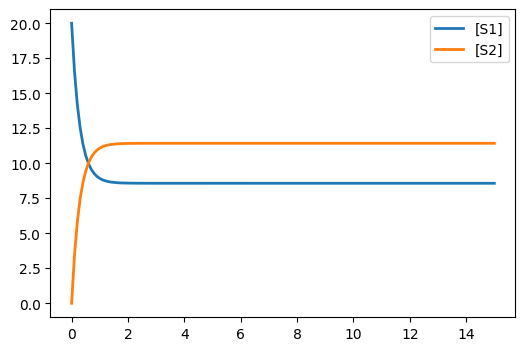

In [37]:
model = """
S1 -> S2; k1*S1
S2 -> S1; k2*S2

S1 = 10
k1 = 2
S2 = 0
k2 = 1.5
"""
rr = te.loada(model)
rr["S1"] = 20 # change the value of a Tellurium symbol
start = 0
end = 15
num_points = 10*(end-start)
data = rr.simulate(start, end, num_points)
rr.plot()

In [24]:
result = rr.steadyState()

In [26]:
rr["S1"], rr["S2"]

(4.2857142857142945, 5.7142857142857055)

In [21]:
data

    time,         [S1],    [S2]
 [[    0,           10,       0],
  [  0.1,      1.00257, 8.99743],
  [  0.2,     0.100514, 9.89949],
  [  0.3,    0.0100772, 9.98992],
  [  0.4,   0.00101031, 9.99899],
  [  0.5,   0.00010129,  9.9999],
  [  0.6,   1.0155e-05, 9.99999],
  [  0.7,  1.01818e-06,      10],
  [  0.8,  1.02108e-07,      10],
  [  0.9,  1.02443e-08,      10],
  [    1,  1.03406e-09,      10],
  [  1.1,  8.76051e-11,      10],
  [  1.2,  5.80879e-12,      10],
  [  1.3, -8.26559e-12,      10],
  [  1.4, -5.36822e-13,      10],
  [  1.5,  2.42559e-12,      10],
  [  1.6,  1.20469e-12,      10],
  [  1.7, -7.64909e-14,      10],
  [  1.8, -6.34072e-13,      10],
  [  1.9, -4.84338e-13,      10],
  [    2, -4.30247e-13,      10],
  [  2.1, -2.62557e-13,      10],
  [  2.2, -3.33802e-13,      10],
  [  2.3, -3.18656e-13,      10],
  [  2.4, -2.17118e-13,      10],
  [  2.5, -8.31667e-14,      10],
  [  2.6, -5.98656e-14,      10],
  [  2.7, -3.89123e-14,      10],
  [  2.8, -2.030

In [29]:
# Extract values of S1
data[:, 0]

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]

In [34]:
# Read a Tellurium value
rr["S2"]

5.714286316452519

# Plotting using ``matplotlib``

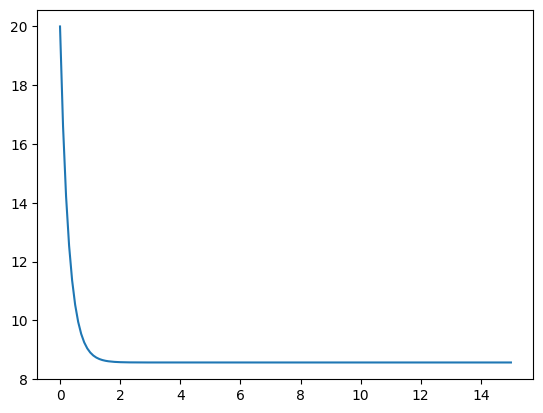

In [38]:
plt.plot(data[:, 0], data[:, 1])

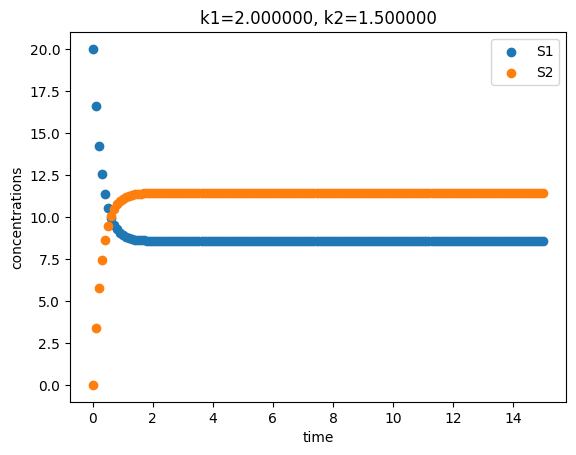

In [53]:
plt.scatter(data[:, 0], data[:, 1]) # Plot S1
plt.scatter(data[:, 0], data[:, 2])
# Title
plt.title("k1=%f, k2=%f" % (rr["k1"], rr["k2"]))
# X axis label
plt.xlabel("time")
# Y axis label
plt.ylabel("concentrations")
plt.legend(["S1", "S2"])

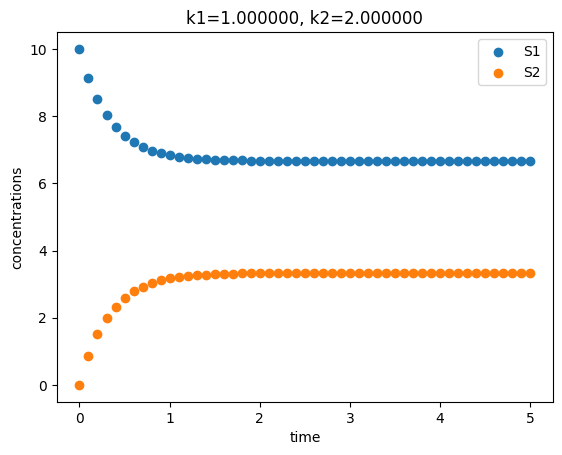

In [61]:
def plotS1S2(k1, k2, ax):
  rr.reset()
  rr["k1"] = k1
  rr["k2"] = k2
  data = rr.simulate()
  ax.scatter(data[:, 0], data[:, 1]) # Plot S1
  ax.scatter(data[:, 0], data[:, 2])
  # Title
  plt.title("k1=%f, k2=%f" % (k1, k2))
  # X axis label
  plt.xlabel("time")
  # Y axis label
  plt.ylabel("concentrations")
  plt.legend(["S1", "S2"])

# Test
_, ax = plt.subplots(1)
plotS1S2(1, 2, ax)

In [48]:
data

        time,    [S1],    [S2]
 [[        0,      20,       0],
  [ 0.100671, 16.6061, 3.39389],
  [ 0.201342, 14.2201, 5.77993],
  [ 0.302013, 12.5426,  7.4574],
  [ 0.402685, 11.3633, 8.63671],
  [ 0.503356, 10.5342, 9.46582],
  [ 0.604027, 9.95131, 10.0487],
  [ 0.704698, 9.54154, 10.4585],
  [ 0.805369, 9.25347, 10.7465],
  [  0.90604, 9.05095, 10.9491],
  [  1.00671, 8.90856, 11.0914],
  [  1.10738, 8.80845, 11.1916],
  [  1.20805, 8.73807, 11.2619],
  [  1.30872, 8.68858, 11.3114],
  [   1.4094,  8.6538, 11.3462],
  [  1.51007, 8.62934, 11.3707],
  [  1.61074, 8.61214, 11.3879],
  [  1.71141, 8.60005, 11.3999],
  [  1.81208, 8.59155, 11.4084],
  [  1.91275, 8.58558, 11.4144],
  [  2.01342, 8.58138, 11.4186],
  [  2.11409, 8.57843, 11.4216],
  [  2.21477, 8.57635, 11.4236],
  [  2.31544, 8.57489, 11.4251],
  [  2.41611, 8.57386, 11.4261],
  [  2.51678, 8.57314, 11.4269],
  [  2.61745, 8.57263, 11.4274],
  [  2.71812, 8.57228, 11.4277],
  [  2.81879, 8.57202,  11.428],
  [  2.91946

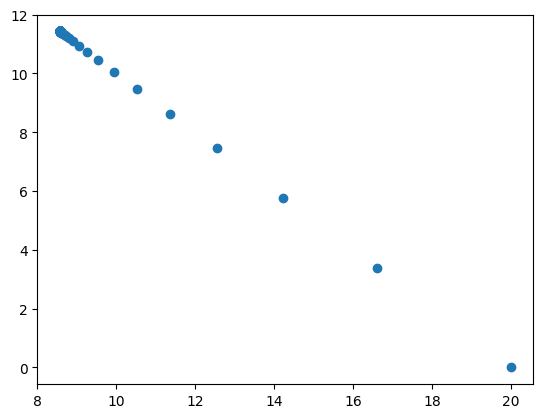

In [49]:
# Scatter plot of S1 vs. S2 for all times
plt.scatter(data[:, 1], data[:, 2])

In [ ]:
def plotS1S2(k1, k2, ax):
  rr.reset()
  rr["k1"] = k1
  rr["k2"] = k2
  data = rr.simulate()
  ax.scatter(data[:, 0], data[:, 1]) # Plot S1
  ax.scatter(data[:, 0], data[:, 2])
  # Title
  plt.title("k1=%f, k2=%f" % (k1, k2))
  # X axis label
  plt.xlabel("time")
  # Y axis label
  plt.ylabel("concentrations")
  plt.legend(["S1", "S2"])

# Test
_, ax = plt.subplots(1)
plotS1S2(1, 2, ax)

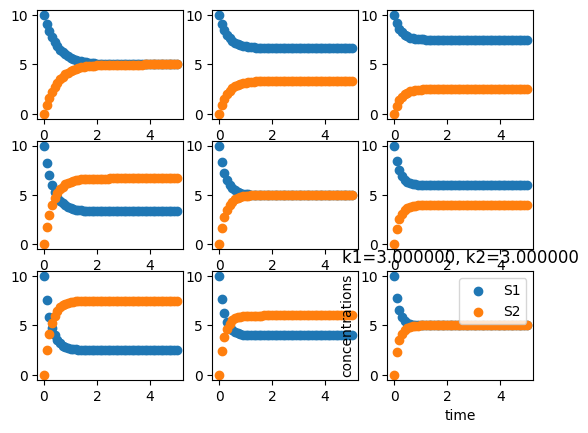

In [65]:
# Doing a collection of plots. Plot time course of S1, S2 for k1, k2 in [1, 2, 3]
figure, axes = plt.subplots(3, 3)
values = [1, 2, 3]
for irow in range(3):
  k1 = values[irow]
  for icol in range(3):
    k2 = values[icol]
    ax = axes[irow, icol]
    plotS1S2(k1, k2, ax)

In [63]:
np.shape(axes)

(3, 3)

# Parameter Scans

Find the value of a parmameter that causes the reaction network to achieve a desired value.

In [70]:
# Evaluate the "goodness" of a parameter setting
def evaluate(k1, k2, desired_steady_state_S1):
  # Calculate squared error difference between desired ss S1 and actual
  rr.reset()
  rr["k1"] = k1
  rr["k2"] = k2
  rr.steadyState()
  goodness = (rr["S1"] - desired_steady_state_S1)**2
  return goodness

# Test
goodness = evaluate(1, 2, 10)
goodness

11.111111111111109

In [74]:
# Scan all possible combinations of parameters to find the best settings
values = range(1, 20)
best_k1 = None
best_k2 = None
best_goodness = 1e3
for irow in range(3):
  k1 = values[irow]
  for icol in range(3):
    k2 = values[icol]
    goodness = evaluate(k1, k2, 9)
    if goodness < best_goodness:
      best_goodness = goodness
      best_k1 = k1
      best_k2 = k2
print(best_goodness, best_k1, best_k2)

2.25 1 3
